In [1]:
import pandas as pd
import numpy as np
import scipy as sp
pd.options.display.max_rows = 400
pd.options.display.max_columns = 400
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import f1_score, brier_score_loss, accuracy_score, confusion_matrix, precision_score,\
    recall_score

In [1]:
from creon.loadcreon import LoadCreon, load_search, save_search
from creon.creonsklearn.creonmetrics import pu_scorer, prior_squared_error_scorer_015, \
    brier_score_labeled_loss_scorer, f1_assumed_scorer, f1_labeled_scorer, labeled_metric, assumed_metric
from creon.semisuperhelper import SemiSupervisedHelper
from creon.creonsklearn.pnuwrapper import PNUWrapper

In [4]:
import datetime

In [20]:
rs = joblib.load('res\\20170110random_rf_searcher.pkl')

In [6]:
rs = joblib.load('res\\random_rf_searcher_20170118_00_46.pkl')

In [8]:
rs_df = pd.DataFrame(rs.cv_results_)

In [9]:
rs_df

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_base_estimator__class_weight,param_base_estimator__max_depth,param_base_estimator__max_features,param_base_estimator__min_samples_leaf,param_base_estimator__min_samples_split,param_base_estimator__n_estimators,param_num_unlabeled,params,rank_test_score,split0_test_score,split0_test_score_data,split0_train_score,split0_train_score_data,split1_test_score,split1_test_score_data,split1_train_score,split1_train_score_data,split2_test_score,split2_test_score_data,split2_train_score,split2_train_score_data,std_fit_time,std_score_time,std_test_score,std_train_score
0,52.676338,104.647074,0.663147,0.666253,balanced_subsample,18,50,100,0.432634,4477,4159,"{'base_estimator__max_depth': 18, 'num_unlabel...",5,0.662203,"{'assumed_brier': 0.156214358728, 'labeled_avg...",0.659115,"{'assumed_brier': 0.155909111755, 'labeled_avg...",0.660039,"{'assumed_brier': 0.151699229722, 'labeled_avg...",0.670600,"{'assumed_brier': 0.151930082285, 'labeled_avg...",0.667198,"{'assumed_brier': 0.152782858475, 'labeled_avg...",0.669042,"{'assumed_brier': 0.152797202178, 'labeled_avg...",0.530454,1.991782,0.002998,0.005087
1,197.975973,204.935282,0.410286,0.415421,None,47,50,2,0.199384,3674,4417,"{'base_estimator__max_depth': 47, 'num_unlabel...",24,0.401322,"{'assumed_brier': 0.0304283970833, 'labeled_av...",0.407636,"{'assumed_brier': 0.0300914559567, 'labeled_av...",0.426510,"{'assumed_brier': 0.0308700868693, 'labeled_av...",0.412386,"{'assumed_brier': 0.0309821064404, 'labeled_av...",0.403024,"{'assumed_brier': 0.0308451037957, 'labeled_av...",0.426240,"{'assumed_brier': 0.0308923349986, 'labeled_av...",12.681618,22.567749,0.011493,0.007893
2,20.637338,45.484692,0.506386,0.508924,balanced_subsample,18,sqrt,6,0.633566,2763,8663,"{'base_estimator__max_depth': 18, 'num_unlabel...",21,0.505212,"{'assumed_brier': 0.237878822989, 'labeled_avg...",0.519183,"{'assumed_brier': 0.237827260197, 'labeled_avg...",0.521320,"{'assumed_brier': 0.237964397055, 'labeled_avg...",0.526771,"{'assumed_brier': 0.237992060151, 'labeled_avg...",0.492625,"{'assumed_brier': 0.2394107774, 'labeled_avg_p...",0.480819,"{'assumed_brier': 0.239418100729, 'labeled_avg...",1.735529,1.445927,0.011744,0.020114
3,42.182670,155.053097,0.661413,0.678097,balanced_subsample,43,sqrt,8,0.0890471,3552,4015,"{'base_estimator__max_depth': 43, 'num_unlabel...",6,0.663982,"{'assumed_brier': 0.137575663017, 'labeled_avg...",0.675287,"{'assumed_brier': 0.13703676385, 'labeled_avg_...",0.653591,"{'assumed_brier': 0.136689485036, 'labeled_avg...",0.681120,"{'assumed_brier': 0.136947178036, 'labeled_avg...",0.666667,"{'assumed_brier': 0.138032272677, 'labeled_avg...",0.677884,"{'assumed_brier': 0.13798607461, 'labeled_avg_...",1.218806,2.156851,0.005639,0.002386
4,27.726578,191.910165,0.651835,0.719574,balanced_subsample,31,5,2,0.0209665,3472,3295,"{'base_estimator__max_depth': 31, 'num_unlabel...",8,0.653105,"{'assumed_brier': 0.128652381225, 'labeled_avg...",0.712838,"{'assumed_brier': 0.127800270267, 'labeled_avg...",0.649751,"{'assumed_brier': 0.125471356061, 'labeled_avg...",0.726920,"{'assumed_brier': 0.125450299309, 'labeled_avg...",0.652650,"{'assumed_brier': 0.127805076673, 'labeled_avg...",0.718965,"{'assumed_brier': 0.127495902028, 'labeled_avg...",0.892014,1.540844,0.001486,0.005765
5,24.978296,83.129137,0.490259,0.499322,balanced,7,10,50,0.554682,3733,10342,"{'base_estimator__min_samples_leaf': 50, 'num_...",22,0.475789,"{'assumed_brier': 0.213165242274, 'labeled_avg...",0.496443,"{'assumed_brier': 0.212973070715, 'labeled_avg...",0.493225,"{'assumed_brier': 0.210630356267, 'labeled_avg...",0.504432,"{'assumed_brier': 0.210753849193, 'labeled_avg...",0.501763,"{'assumed_brier': 0.212221213474, 'labeled_avg...",0.497090,"{'assumed_brier': 0.212235671309, 'labeled_avg...",0.554994,0.453386,0.010810,0.003623
6,6.791244,31.481002,0.108259,0.108193,balanced,28,sqrt,7,0.990191,2120,5983,"{'base_estimator__min_samples_leaf': 7, 'n

In [11]:
rs_df.mean_test_score

0     0.663147
1     0.410286
2     0.506386
3     0.661413
4     0.651835
5     0.490259
6     0.108259
7     0.618156
8     0.108259
9     0.670755
10    0.216384
11    0.216384
12    0.000000
13    0.000000
14    0.526376
15    0.000000
16    0.000000
17    0.581692
18    0.595718
19    0.709135
20    0.096806
21    0.581462
22    0.000000
23    0.529074
24    0.531741
25    0.000000
26    0.000000
27    0.518754
28    0.702426
29    0.000000
30    0.489900
31    0.000000
32    0.656222
33    0.675234
34    0.001210
35    0.604819
36    0.521595
37    0.533122
38    0.534451
39    0.000000
Name: mean_test_score, dtype: float64

In [12]:
path = "C:\Data\\010317\membership14_final_0103.txt"
lc = LoadCreon(path)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(lc.X, lc.y, test_size=0.2, random_state=771, stratify=lc.y)

In [14]:
rs_df.params.iloc[19]

{'base_estimator__class_weight': 'balanced',
 'base_estimator__max_depth': 30,
 'base_estimator__max_features': 50,
 'base_estimator__min_samples_leaf': 2,
 'base_estimator__min_samples_split': 0.011420604299324233,
 'base_estimator__n_estimators': 3594,
 'num_unlabeled': 6490}

In [16]:
clf = rs.best_estimator_

In [23]:
clf

PNUWrapper(base_estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=30, max_features=50,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=2, min_samples_split=0.011420604299324233,
            min_weight_fraction_leaf=0.0, n_estimators=3594, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
      num_unlabeled=6490, pu_learning=None, random_state=771,
      threshold_set_pct=None)

In [24]:
from sklearn.base import clone

In [41]:
clf_pu = PNUWrapper(base_estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=30, max_features=50,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=2, min_samples_split=0.011420604299324233,
            min_weight_fraction_leaf=0.0, n_estimators=3594, n_jobs=4,
            oob_score=False, random_state=56, verbose=0,
            warm_start=False),
      num_unlabeled=6490, pu_learning=True, random_state=771,
      threshold_set_pct=None)

In [48]:
clf_pnu = PNUWrapper(base_estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=30, max_features=50,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=2, min_samples_split=0.011420604299324233,
            min_weight_fraction_leaf=0.0, n_estimators=3594, n_jobs=4,
            oob_score=False, random_state=56, verbose=0,
            warm_start=False),
      num_unlabeled=6490, pu_learning=False, random_state=771,
      threshold_set_pct=None)

In [36]:
clf_pu.fit(X_train.values, y_train.values)
clf_pnu.fit(X_train.values, y_train.values)

PNUWrapper(base_estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=30, max_features=50,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=2, min_samples_split=0.011420604299324233,
            min_weight_fraction_leaf=0.0, n_estimators=3594, n_jobs=4,
            oob_score=False, random_state=56, verbose=0, warm_start=False),
      num_unlabeled=6490, pu_learning=False, random_state=771,
      threshold_set_pct=None)

In [37]:
report_metrics(clf_pu, X_test.values, y_test.values)

assumed_brier       0.074578
assumed_f1          0.091629
assumed_f1beta10    0.715888
labeled_acc         0.824645
labeled_avg_prec    0.919474
labeled_brier       0.136296
labeled_f1          0.862112
labeled_prec        0.896641
labeled_recall      0.830144
labeled_roc_auc     0.822049
pr_one_unlabeled    0.077354
pu_score            8.488073
dtype: float64

In [38]:
report_metrics(clf_pnu, X_test.values, y_test.values)

assumed_brier       0.073232
assumed_f1          0.092735
assumed_f1beta10    0.711953
labeled_acc         0.832543
labeled_avg_prec    0.927382
labeled_brier       0.104727
labeled_f1          0.866499
labeled_prec        0.914894
labeled_recall      0.822967
labeled_roc_auc     0.837065
pr_one_unlabeled    0.075708
pu_score            8.526627
dtype: float64

In [50]:
from sklearn.model_selection import validation_curve
param_range = [50, 100, 200, 300, 400, 500, 750, 1000, 1250, 1500]
train_scores, test_scores = validation_curve(clf_pnu, X_train.values, y_train.values, param_name='base_estimator__n_estimators', param_range=param_range, cv=3, scoring=pu_scorer, n_jobs=-1)

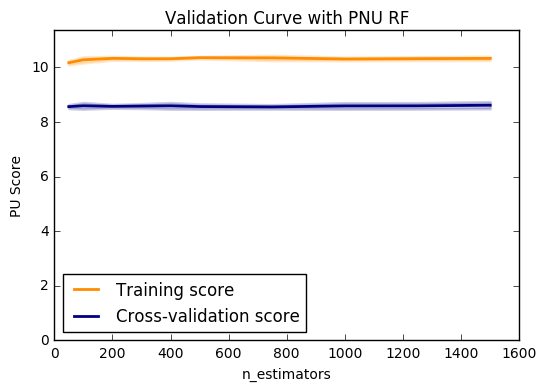

In [54]:
import matplotlib.pyplot as plt
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with PNU RF")
plt.xlabel("n_estimators")
plt.ylabel("PU Score")
plt.ylim(0.0, train_scores_mean.max() + 1.0)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [8]:
rf = RandomForestClassifier()
pnu = PNUWrapper(base_estimator=rf, num_unlabeled=5819, threshold_set_pct=0.0143, random_state=77)

In [12]:
pnu.set_params(**rs_df.params.iloc[17])

PNUWrapper(base_estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=23, max_features=None,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=4, min_samples_split=0.18761334000444152,
            min_weight_fraction_leaf=0.0, n_estimators=496, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
      num_unlabeled=8057, random_state=77, threshold_set_pct=None)

In [13]:
pnu.fit(X_train.values, y_train.values)

PNUWrapper(base_estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=23, max_features=None,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=4, min_samples_split=0.18761334000444152,
            min_weight_fraction_leaf=0.0, n_estimators=496, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
      num_unlabeled=8057, random_state=77, threshold_set_pct=None)

In [17]:
y_prob = clf.predict_proba(X_test.values)
y_pred = clf.predict(X_test.values)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000167DD908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001578EC88>]], dtype=object)

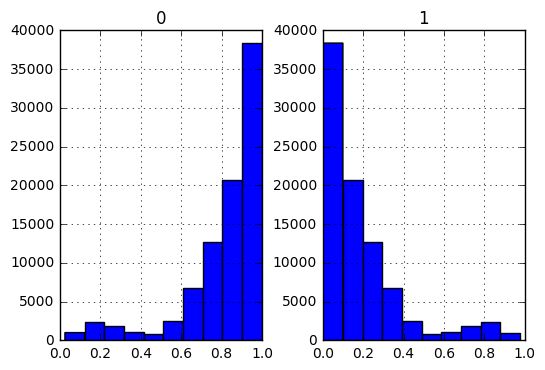

In [18]:
pd.DataFrame(y_prob).hist()

In [17]:
labeled_metric(y_test.values, y_prob, brier_score_loss)

0.13320342260066118

In [18]:
assumed_metric(y_test.values, y_prob, brier_score_loss)

0.089703572051049146

In [19]:
labeled_metric(y_test.values, y_pred, f1_score)

0.85750315258511978

In [20]:
assumed_metric(y_test.values, y_pred, f1_score)

0.095990965556182944

In [25]:
np.bincount(y_pred)[1] / len(y_pred)

0.075629680054458817

In [26]:
assumed_metric(y_test.values, y_pred, confusion_matrix)

array([[81396,  6326],
       [   78,   340]])

In [27]:
labeled_metric(y_test.values, y_pred, confusion_matrix)

array([[180,  35],
       [ 78, 340]])

In [28]:
from sklearn.metrics import fbeta_score

In [32]:
assumed_metric(y_test.values, y_pred, fbeta_score, beta=60)

0.8100347609539349

In [33]:
from creonmetrics import make_assumed_scorer

In [34]:
fbeta60 = make_assumed_scorer(fbeta_score, beta=60)

In [35]:
fbeta60(pnu, X_test.values, y_test.values)

0.8100347609539349

In [38]:
fbeta_score.__name__

'fbeta_score'

In [20]:
from creonmetrics import report_metrics

In [48]:
report_metrics(pnu, X_test.values, y_test.values)

assumed_brier       0.089704
assumed_f1          0.095991
assumed_f1beta10    0.708538
assumed_f1beta60    0.810035
labeled_acc         0.821485
labeled_avg_prec    0.921643
labeled_brier       0.133203
labeled_f1          0.857503
labeled_prec        0.906667
labeled_recall      0.813397
labeled_roc_auc     0.825303
pr_one_unlabeled    0.071891
pu_score            8.748085
dtype: float64

In [21]:
report_metrics(clf, X_test.values, y_test.values)

assumed_brier       0.073458
assumed_f1          0.092710
assumed_f1beta10    0.711923
labeled_acc         0.832543
labeled_avg_prec    0.927382
labeled_brier       0.104740
labeled_f1          0.866499
labeled_prec        0.914894
labeled_recall      0.822967
labeled_roc_auc     0.837065
pr_one_unlabeled    0.075731
pu_score            8.524192
dtype: float64

In [9]:
pnu.set_params(**rs_df.params.iloc[20])

PNUWrapper(base_estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=3, max_features=None,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=100, min_samples_split=0.03737708549699359,
            min_weight_fraction_leaf=0.0, n_estimators=623, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
      num_unlabeled=14213, random_state=77, threshold_set_pct=None)

In [63]:
pnu.fit(X_train.values, y_train.values)

PNUWrapper(base_estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=3, max_features=None,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=100, min_samples_split=0.03737708549699359,
            min_weight_fraction_leaf=0.0, n_estimators=623, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
      num_unlabeled=14213, random_state=77, threshold_set_pct=None)

In [64]:
report_metrics(pnu, X_test.values, y_test.values)

assumed_brier       0.085076
assumed_f1          0.096005
assumed_f1beta10    0.708553
assumed_f1beta60    0.810035
labeled_acc         0.821485
labeled_avg_prec    0.921643
labeled_brier       0.135563
labeled_f1          0.857503
labeled_prec        0.906667
labeled_recall      0.813397
labeled_roc_auc     0.825303
pr_one_unlabeled    0.071880
pu_score            8.749398
dtype: float64

In [71]:
pd.DataFrame(pnu.base_estimator.feature_importances_, index=X_test.columns).sort_values(by=0, ascending=False)

,0
DIAG_FLAG4_Sum,0.652172
DIAG_FLAG5_Sum,0.299476
ndc_cat58_Sum,0.040698
CPT_FLAG18_Sum,0.002328
CPT_FLAG12_Sum,0.002055
DIAG_FLAG6_Sum,0.001196
ndc_cat87_Sum,0.000674
REVCODE_FLAG15_Sum,0.000600
ndc_cat45_Sum,0.000293
age,0.000201


In [10]:
from sklearn.model_selection import learning_curve

In [11]:
train_sizes, train_scores, test_scores = learning_curve(pnu, X_train.values, 
                                                        y_train.values, train_sizes=np.asarray([0.05, 0.1, 0.2, 0.5, 1]),
                                                        n_jobs=-1, verbose=10, scoring=pu_scorer)

[learning_curve] Training set sizes: [ 11751  23503  47007 117518 235036]


[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:  1.9min remaining: 12.7min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  2.3min remaining:  6.5min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:  4.0min remaining:  6.0min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  4.5min remaining:  3.9min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  5.7min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  6.5min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  8.8min finished


In [12]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

In [13]:
import matplotlib.pyplot as plt

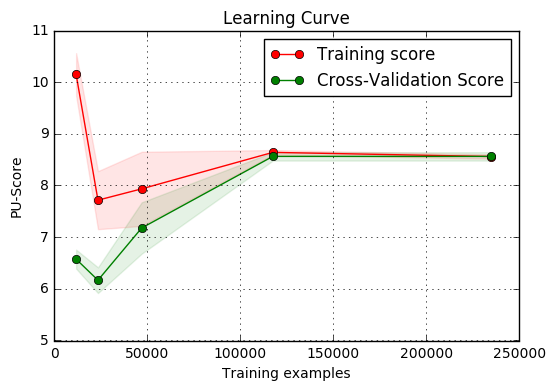

In [16]:
plt.figure()
plt.title('Learning Curve')
plt.xlabel("Training examples")
plt.ylabel("PU-Score")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, 
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.legend(loc="best")